# Subject 1

Variable and their domains

- O: cold, mild
- H: yes, no
- W: Yes, No
- R: Warm, Cold
- E: High, Low
- C: Confortable, Unconfortable

## Solution a)

In [2]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

import networkx as nx
import numpy as np


Create a bayesian network

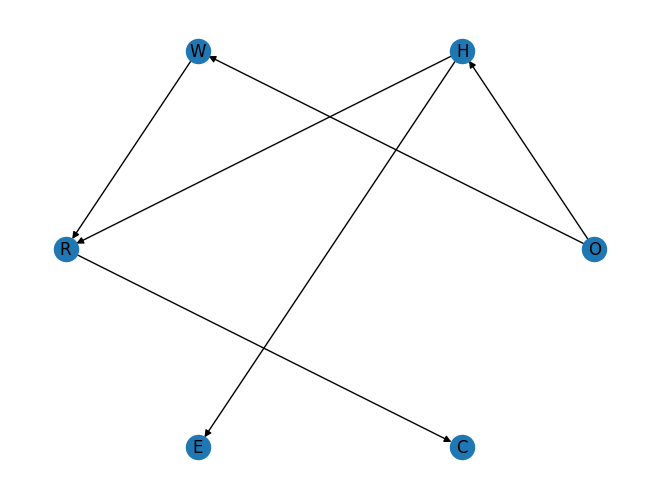

In [9]:
model = DiscreteBayesianNetwork([
    ("O", "H"),
    ("O", "W"),
    ("H", "R"),
    ("W", "R"),
    ("H", "E"),
    ("R", "C"),
])

pos = nx.circular_layout(model)

nx.draw(model, pos=pos, with_labels=True)

Adding the CPT

In [12]:
# Probabilities of O: cold=0.3, mild=0.7

cpd_outside = TabularCPD(
    variable="O",
    variable_card=2,
    values=[
        [0.3],
        [0.7]
    ]
)

cpd_heater = TabularCPD(
    variable="H",
    variable_card=2,
    values=[
        [0.1, 0.8],
        [0.9, 0.2]
    ],
    evidence=["O"],
    evidence_card=[2]
)

cpd_window = TabularCPD(
    variable="W",
    variable_card=2,
    values=[
        [0.9, 0.4],
        [0.1, 0.6]
    ],
    evidence=["O"],
    evidence_card=[2]
)

cpd_roomtemp = TabularCPD(
    variable="R",
    variable_card=2,
    values=[
        [0.4, 0.1, 0.7, 0.5],
        [0.6, 0.9, 0.3, 0.5]
    ],
    evidence=["H", "W"],
    evidence_card=[2, 2]

)

cpd_energy = TabularCPD(
    variable="E",
    variable_card=2,
    values=[
        [0.2, 0.8],
        [0.8, 0.2]
    ],
    evidence=["H"],
    evidence_card=[2]
)

cpd_confort = TabularCPD(
    variable="C",
    variable_card=2,
    values=[
        [0.15, 0.6],
        [0.85, 0.4]
    ],
    evidence=["R"],
    evidence_card=[2]
)

model.add_cpds(cpd_outside, cpd_heater, cpd_window, cpd_roomtemp, cpd_energy, cpd_confort)


True


## solution b)

- Computing `P(H=Yes | C=Confortable)` using Variable elimination

In [13]:
infer = VariableElimination(model)

In [15]:
result1 = infer.query(["H"], evidence={"C": 1})

print(result1)

+------+----------+
| H    |   phi(H) |
+======+==========+
| H(0) |   0.5115 |
+------+----------+
| H(1) |   0.4885 |
+------+----------+


Probability: `P(H=Yes | C=Confortable)` is 0.4885

- Computing `P(E=high | C=Confortable)`

In [16]:
result2 = infer.query(["E"], evidence={"C": 1})
print(result2)

+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.4931 |
+------+----------+
| E(1) |   0.5069 |
+------+----------+


`P(E=high | C=Confortable)` = 0.5069

MAP estimations for (H and W) if we know that C is comfortable

In [17]:
result3 = infer.query(["H", "W"], evidence={"C": 1})
print(result3)

+------+------+------------+
| H    | W    |   phi(H,W) |
+======+======+============+
| H(0) | W(0) |     0.2512 |
+------+------+------------+
| H(0) | W(1) |     0.2603 |
+------+------+------------+
| H(1) | W(0) |     0.3689 |
+------+------+------------+
| H(1) | W(1) |     0.1197 |
+------+------+------------+


# subject 2

## solution a)

In [18]:
from hmmlearn import hmm


states

In [19]:
states = ["W", "R", "S"]
len_states = len(states)

Observers

In [44]:
observation = ["L", "M", "H"]
len_observation = len(observation)

Transition matrix

In [20]:
transition_matrix = np.array([
    [0.6, 0.3, 0.1],
    [0.2, 0.7, 0.1],
    [0.3, 0.2, 0.5]
])

Emmision matrix

In [21]:
emmision_matrix = np.array([
    [0.1, 0.7, 0.2],
    [0.05, 0.25, 0.7],
    [0.8, 0.15, 0.05]
])

Initial Probabilities

In [23]:
initial_probs = np.array([0.4, 0.3, 0.3])

Creating the model

In [45]:
hmm_model = hmm.CategoricalHMM(n_components=len_states, random_state=42)
hmm_model.startprob_ = initial_probs
hmm_model.transmat_ = transition_matrix
hmm_model.emissionprob_ = emmision_matrix

## solution b)

In [46]:
observation_seq = ["M", "H", "L"]
observation_indices = [0 if obs == "L" else 1 if obs == "M" else 2 for obs in observation_seq]

obs = np.array(observation_indices).reshape(-1, 1)

log_prob = hmm_model.score(obs)
prob = np.exp(log_prob)

print(f"Probability for the sequence {observation_seq} is: {prob:.4f}")

Probability for the sequence ['M', 'H', 'L'] is: 0.0211


## solution c)

In [47]:
state_seq = model.predict(obs)

print(f"Most probable state sequence is {[states[idx] for idx in state_seq]}:")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'